<a href="https://colab.research.google.com/github/Jarmos-san/Titanic/blob/master/Titanic_Machine_Learning_from_Disaster_%7C_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic)**

---

## **Description**

####**The Challenge**

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

*In this challenge, we ask you to build a predictive model that answers the question: “**what sorts of people were more likely to survive?**” using passenger data (ie name, age, gender, socio-economic class, etc).*

#### **What Data Will I Use in This Competition?**

In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

#### **Evaluation**

1. **Goal**:

  It is your job to predict if a passenger survived the sinking of the Titanic or not.
  For each in the test set, you must predict a 0 or 1 value for the variable.
2. **Metric**:

  Your score is the percentage of passengers you correctly predict. This is known as [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification).
3. **Submission File Format**:

  You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.

  The file should have exactly 2 columns:
  - PassengerId (sorted in any order)
  - Survived (contains your binary predictions: `1` for survived, `0` for deceased)
    
    ```
    PassengerId,Survived
    892,0
    893,1
    894,0
    Etc.
    ```

  You can download an example submission file (gender_submission.csv) on the Data page.

## **Data** 

#### **Overview**

The data has been split into two groups:
- training set (`train.csv`)
- test set (`test.csv`)

The **training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like `passengers’` `gender` and `class`. You can also use feature engineering to create new features.

The **test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include `gender_submission.csv`, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

#### **Data Dictionary**

| Variable |          Definition          |                      Key                      |
|----------|------------------------------|-----------------------------------------------|
| survival | Survival                     | `0`=No,`1`=Yes                                |
| pclass   | Ticket Class                 | `1`=1st,`2`=2nd,`3`=3rd                       |
| sex      | Gender                       |                                               |
| Age      | Age in Years                 |                                               |
| sibsp    | # of Siblings/Spouses aboard |                                               |
| parch    | # of parents/Children aboard |                                               |
| ticket   | Ticket Number                |                                               |
| fare     | Ticket Fare                  |                                               |
| cabin    | Cabin Number                 |                                               |
| embarked | Port of Embarkation          | `C`=Cherboug,`Q`=Queenstown,`S`=Southampton   |

#### **Variable Notes**

- `pclass`: A proxy for socio-economic status (SES)
  
  - 1st = Upper
  - 2nd = Middle
  - 3rd = Lower

- `age`: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- `sibsp`: The dataset defines family relations in this way...
  - `Sibling` = brother, sister, stepbrother, stepsister
  - `Spouse` = husband, wife (mistresses and fiancés were ignored)

- `parch`: The dataset defines family relations in this way...
  - Parent = mother, father
  - Child = daughter, son, stepdaughter, stepson
  - Some children travelled only with a nanny, therefore parch=0 for them.

## Setting Up the Notebook

In [0]:
# Install PyDrive into the Colab instance
!pip install -U -q PyDrive

# Import the required libraries from PyDrive 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive instance.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Get shareable link by right-clicking on the required file from GDrive
shareableLinkTest = 'https://drive.google.com/open?id=1OyL0Mlt3vU44zmamL_iwPBwVSu2xuCJ-'
shareableLinkTrain = 'https://drive.google.com/open?id=12pDq5mWPFqps0yFV3epfrvgVaf4l44bk'

# Get a string of numbers
_, TestID = shareableLinkTest.split('=')
_, TrainID = shareableLinkTrain.split('=')

# Create Pandas dataframe
getTestID = drive.CreateFile({'id': TestID}) 
getTestID.GetContentFile('test.csv')

getTrainID = drive.CreateFile({'id': TrainID})
getTrainID.GetContentFile('train.csv')

# Importing Libraries

- **Pandas** *v0.25.3*
- **Seaborn** *v0.9.0*
- **Missingno** *v0.4.2*
- **Numpy** *v1.17.5*

In [3]:
# Importing the required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno

# import sklearn
# from sklearn.impute import SimpleImputer

# Checking library versions
print(f'Pandas v{pd.__version__}')
print(f'Seaborn v{sns.__version__}')
print(f'Missingno v{missingno.__version__}')
print(f'Numpy v{np.__version__}')
# print(f'Sklearn v{sklearn.__version__}')

%matplotlib inline
sns.set(style='darkgrid')
plt.figure(figsize=(18,12))

Pandas v0.25.3
Seaborn v0.9.0
Missingno v0.4.2
Numpy v1.17.5


<Figure size 1296x864 with 0 Axes>

<Figure size 1296x864 with 0 Axes>

# Dataset Overview

## Load Dataset

In [0]:
PATH = '/content/'

def loadDataFrame(data):
  '''load the Pandas DataFrame object & output the necessary information'''
  df = pd.read_csv(f'{PATH}{data}')
  print(f'Size of DataFrame object: {df.shape[0]} rows & {df.shape[1]} columns.')
  return df.copy()

In [5]:
TrainData = loadDataFrame('train.csv')
TrainData.sample(3)

Size of DataFrame object: 891 rows & 12 columns.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
232,233,0,2,"Sjostedt, Mr. Ernst Adolf",male,59.0,0,0,237442,13.5000,NaN,S


In [6]:
TestData = loadDataFrame('test.csv')
TestData.sample(3)

Size of DataFrame object: 418 rows & 11 columns.


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
295,1187,3,"Angheloff, Mr. Minko",male,26.0,0,0,349202,7.8958,NaN,S
98,990,3,"Braf, Miss. Elin Ester Maria",female,20.0,0,0,347471,7.8542,NaN,S
56,948,3,"Cor, Mr. Bartol",male,35.0,0,0,349230,7.8958,NaN,S


## Check the Column Names

In [7]:
TrainData.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
TestData.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Check Descriptive Statistics

In [9]:
TrainData.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891
Survived,891,NaN,NaN,NaN,0.383838,0.486592,0,0,0,1,1
Pclass,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3
Name,891,891,"Pasic, Mr. Jakob",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714,NaN,NaN,NaN,29.6991,14.5265,0.42,20.125,28,38,80
SibSp,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8
Parch,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329


## Missing Values

In [0]:
def checkMissingValue(data):
  '''Outputs the amount of missing values and displays a Missing Value Matrix graph'''
  
  MissingValues = data.isna().sum()
  
  for index, value in MissingValues.items():
    if value != 0:
      print(f'{index}: {value}({round(value/data.shape[0]*100)}%)')
  
  return missingno.matrix(data, figsize=(18,12))

### Training Set

Age: 177(20%)
Cabin: 687(77%)
Embarked: 2(0%)


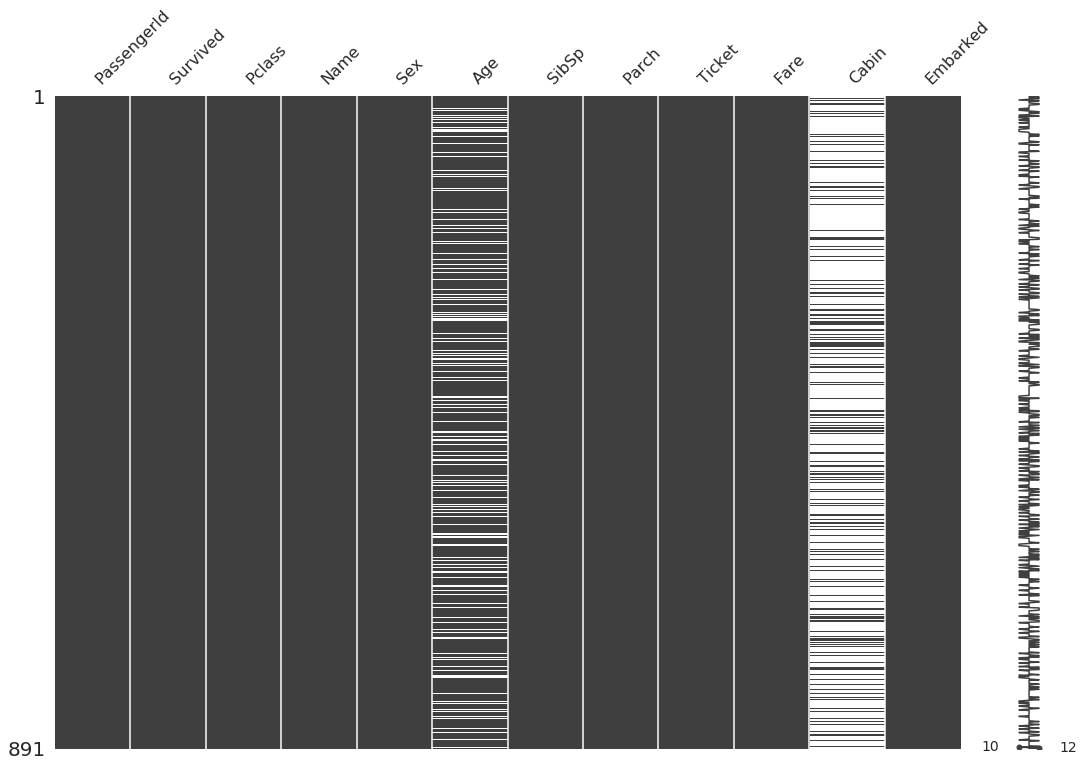

In [11]:
checkMissingValue(TrainData)

### Testing Set

Age: 86(21%)
Fare: 1(0%)
Cabin: 327(78%)


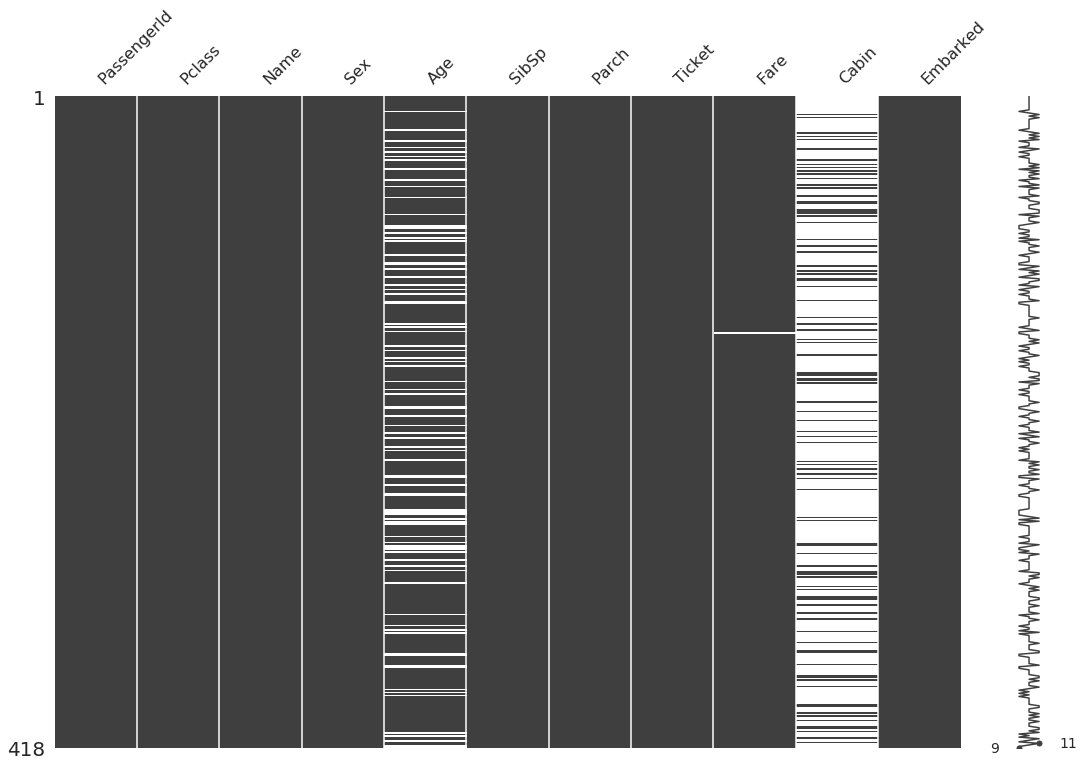

In [12]:
checkMissingValue(TestData)

### Handling Missing Values

## Checking the Data Types

In [13]:
TrainData.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
TestData.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Exploratory Data Analysis

- [Introduction to Exploratory Data Analysis (EDA) | Code Heroku](https://medium.com/code-heroku/introduction-to-exploratory-data-analysis-eda-c0257f888676)

In [15]:
TrainData.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


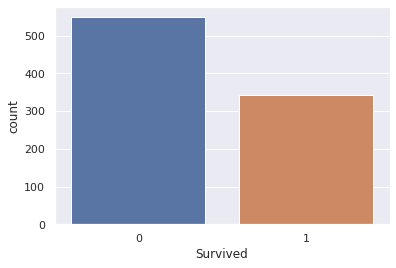

In [16]:
# Couting the number of people who, unfortunately didn't survive
sns.countplot(x='Survived', data=TrainData)

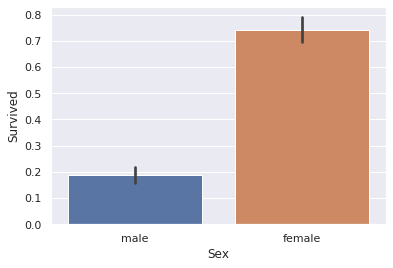

In [17]:
# Checking the number of survivors according to gender
sns.barplot(x='Sex', y='Survived', data=TrainData)

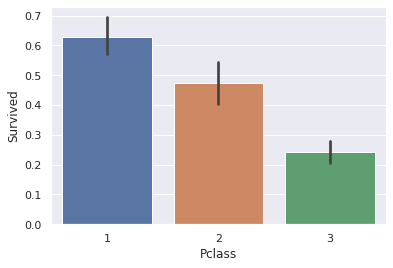

In [18]:
# Checking the number of survivors according to the Class
sns.barplot(x='Pclass', y='Survived', data=TrainData)

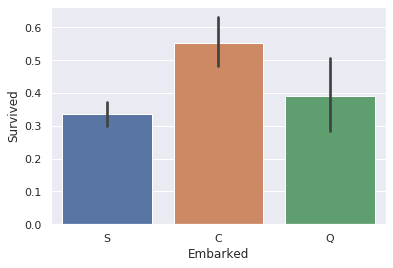

In [19]:
# Checking number of survivors according to the origin of embarkation
sns.barplot(x='Embarked', y='Survived', data=TrainData)

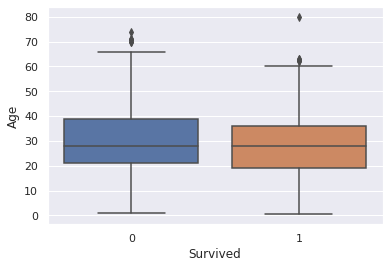

In [22]:
sns.boxplot(x='Survived', y='Age', data=TrainData)

# TODO

- ~Create dynamic function using PyDrive to pull in data from GDrive folders.~ *Not worth*
- Handle missing values
- Simple visualizations
- Visualize continuous variables like Age, Fare, ect among other variables.